In [1]:
# Library
library(tidyverse)
library(reshape2)
library(ComplexHeatmap)
library(dplyr)
library(arrow)
library(circlize)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. C

In [2]:
colors = c('#FDC086','#FFFF99','#F0027F','#BF5B17','#666666',
          '#1B9E77','#D95F02','#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D','#666666',
          '#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00',
          '#CAB2D6','#6A3D9A','#FFFF99','#B15928','#FBB4AE','#B3CDE3','#CCEBC5','#DECBE4',
          '#FED9A6','#FFFFCC','#E5D8BD','#FDDAEC','#F2F2F2','#B3E2CD','#FDCDAC','#CBD5E8',
          '#F4CAE4','#E6F5C9','#FFF2AE','#F1E2CC','#CCCCCC','#E41A1C','#377EB8','#4DAF4A',
          '#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999','#66C2A5','#FC8D62',
          '#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#8DD3C7','#FFFFB3',
          '#BEBADA','#FB8072','#80B1D3','#FDB462','#B3DE69','#FCCDE5','#D9D9D9','#BC80BD',
          '#CCEBC5','#FFED6F')

In [3]:
meta<-read.csv('/home//jupyter/BRI_Analysis/scRNA/hise_meta_data_2024-01-23_fixed.csv') %>% filter(CMV.IgG.Serology.Result.Interpretation=='Positive',
                                                                                              sample.visitName=='Flu Year 1 Day 0'    )

In [4]:
#Annotation 1

In [53]:
meta<-meta %>% mutate(AgeGroup=case_when(cohort.cohortGuid=="BR1"~"Young",TRUE~"Old"))
ha=rowAnnotation(AgeGroup = meta$Age_Group,Sex =meta$subject.biologicalSex, 
                     col = list(Sex=c('Female' ="#FDF1CB", 'Male' = "#4DAF4A"),
                                AgeGroup=c('Young' ="blue", 'Old' = "red")
                               ))

In [54]:
counts_df<-read.csv('/home//jupyter/BRI_Analysis/scRNA/Analysis_Y1_Y2_Comparsion/count_df_scRNA.csv')

In [55]:
sort(unique(counts_df$AIFI_L3))

[1] "Activated memory B cell"             
 [2] "Adaptive NK cell"                    
 [3] "ASDC"                                
 [4] "BaEoMaP cell"                        
 [5] "C1Q+ CD16 monocyte"                  
 [6] "CD14+ cDC2"                          
 [7] "CD27- effector B cell"               
 [8] "CD27+ effector B cell"               
 [9] "CD4 MAIT"                            
[10] "CD56bright NK cell"                  
[11] "CD8 MAIT"                            
[12] "CD8aa"                               
[13] "CD95 memory B cell"                  
[14] "cDC1"                                
[15] "CLP cell"                            
[16] "CM CD4 T cell"                       
[17] "CM CD8 T cell"                       
[18] "CMP cell"                            
[19] "Core CD14 monocyte"                  
[20] "Core CD16 monocyte"                  
[21] "Core memory B cell"                  
[22] "Core naive B cell"                   
[23] "Core naive CD4 T cell"               
[24] "Core naive CD8 T cell "              
[25] "DN T cell"                           
[26] "Early memory B cell"                 
[27] "Erythrocyte"                         
[28] "GZMB- CD27- EM CD4 T cell"           
[29] "GZMB- CD27+ EM CD4 T cell"           
[30] "GZMB+ Vd2 gdT"                       
[31] "GZMK- CD27+ EM CD8 T cell"           
[32] "GZMK- CD56dim NK cell"               
[33] "GZMK+ CD27+ EM CD8 T cell"           
[34] "GZMK+ CD56dim NK cell"               
[35] "GZMK+ memory CD4 Treg"               
[36] "GZMK+ Vd2 gdT"                       
[37] "HLA-DRhi cDC2"                       
[38] "IL1B+ CD14 monocyte"                 
[39] "ILC"                                 
[40] "Intermediate monocyte"               
[41] "ISG+ CD14 monocyte"                  
[42] "ISG+ CD16 monocyte"                  
[43] "ISG+ CD56dim NK cell"                
[44] "ISG+ cDC2"                           
[45] "ISG+ MAIT"                           
[46] "ISG+ memory CD4 T cell"              
[47] "ISG+ memory CD8 T cell"              
[48] "ISG+ naive B cell"                   
[49] "ISG+ naive CD4 T cell"               
[50] "ISG+ naive CD8 T cell"               
[51] "KLRB1+ memory CD4 Treg"              
[52] "KLRB1+ memory CD8 Treg"              
[53] "KLRF1- effector Vd1 gdT"             
[54] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[55] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[56] "KLRF1+ effector Vd1 gdT"             
[57] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[58] "Memory CD4 Treg"                     
[59] "Memory CD8 Treg"                     
[60] "Naive CD4 Treg"                      
[61] "Naive Vd1 gdT"                       
[62] "pDC"                                 
[63] "Plasma cell"                         
[64] "Platelet"                            
[65] "Proliferating NK cell"               
[66] "Proliferating T cell"                
[67] "SOX4+ naive CD4 T cell"              
[68] "SOX4+ naive CD8 T cell"              
[69] "SOX4+ Vd1 gdT"                       
[70] "Transitional B cell"                 
[71] "Type 2 polarized memory B cell"

In [56]:
expanded_selected_celltypes<-c('Adaptive NK cell','KLRF1- GZMB+ CD27- EM CD8 T cell','KLRF1+ GZMB+ CD27- EM CD8 T cell','GZMK+ CD27+ EM CD8 T cell',
                              'KLRF1- GZMB+ CD27- memory CD4 T cell','KLRF1- effector Vd1 gdT','KLRF1+ effector Vd1 gdT')

In [57]:
counts_df_filtered<-counts_df %>% filter(AIFI_L3%in% expanded_selected_celltypes,pbmc_sample_id %in% meta$pbmc_sample_id)

In [58]:
n_distinct(counts_df_filtered$subject.subjectGuid)

[1] 42

In [59]:
counts_df_filtered<-counts_df_filtered %>% 
  group_by(pbmc_sample_id) %>%
  mutate(total_frequency = sum(Freq), 
         percentage_CMV_expanded = Freq / total_frequency * 100) %>%
  select(-total_frequency) %>% ungroup()

In [60]:
count_df_wide <- pivot_wider(counts_df_filtered[c('AIFI_L3','percentage_CMV_expanded','subject.subjectGuid')], names_from = AIFI_L3, values_from = percentage_CMV_expanded)
count_df_wide[is.na(count_df_wide)] <- 0
count_df_wide<-as.data.frame(count_df_wide)

In [61]:
rownames(count_df_wide)<-count_df_wide$subject.subjectGuid
count_df_wide<-count_df_wide[,2:8]

In [73]:
options(repr.plot.width = 20, repr.plot.height = 8)

ht<-Heatmap(count_df_wide,cluster_columns=FALSE, cutree_rows = 3,left_annotation=ha)

ERROR: Error in Heatmap(count_df_wide, cluster_columns = FALSE, cutree_rows = 3, : unused argument (cutree_rows = 3)


In [71]:
pdf(width = 20,height = 10)
draw(ht, merge_legend = TRUE, heatmap_legend_side = "bottom", 
    annotation_legend_side = "bottom")
dev.off()


png 
  2

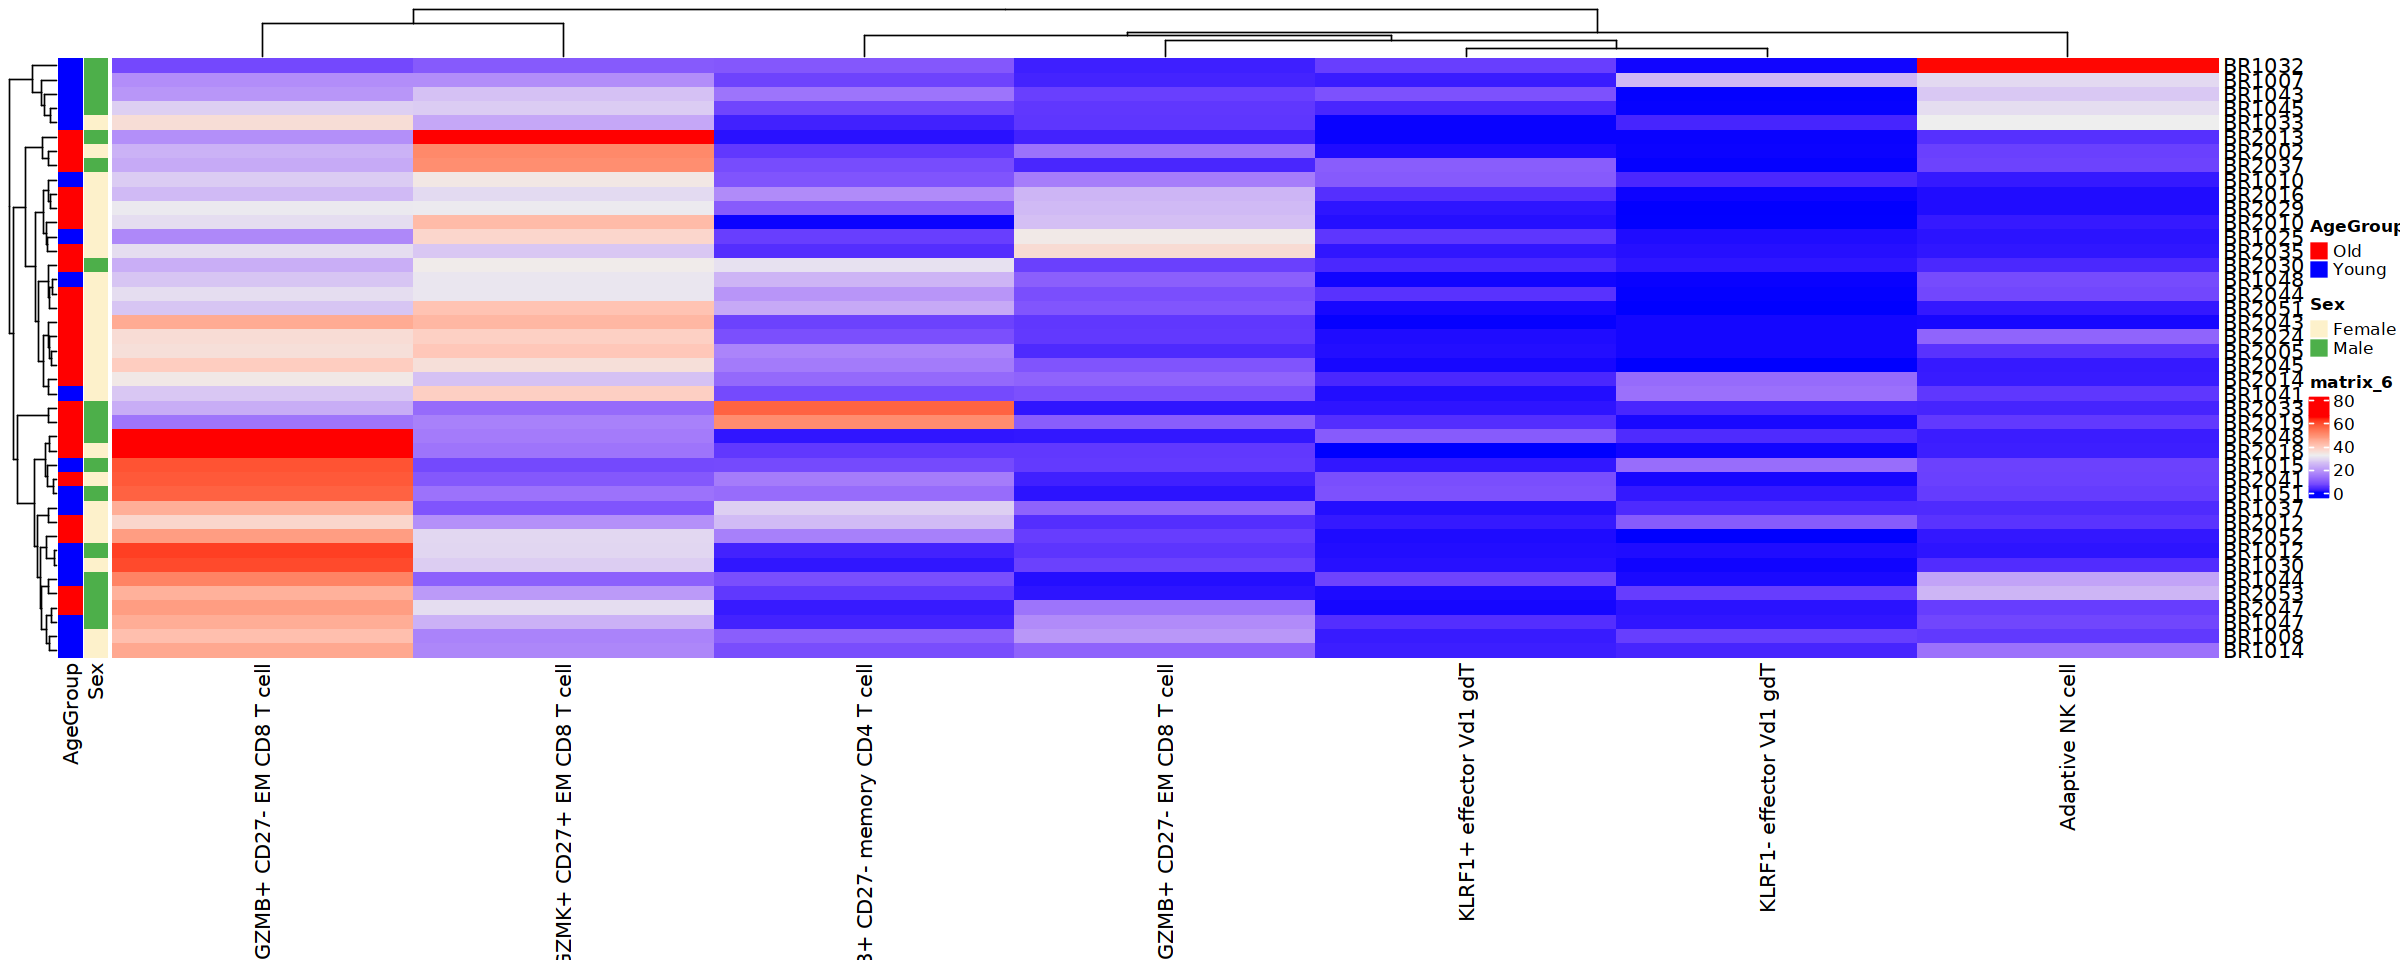

In [72]:
ht = draw(ht)

In [67]:
counts_df_filtered$subject.subjectGuid <- factor(counts_df_filtered$subject.subjectGuid, levels = rev(meta$subject.subjectGuid[row_order(ht)]))


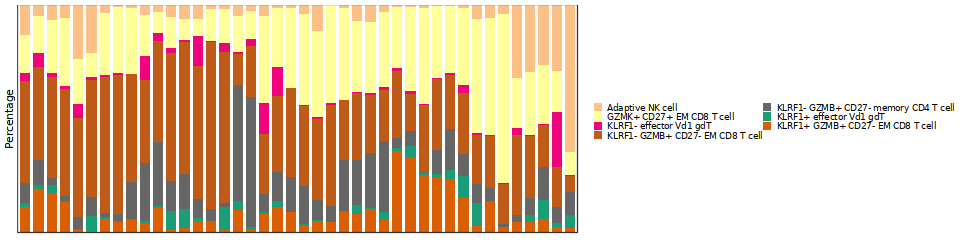

In [68]:
options(repr.plot.width = 8, repr.plot.height = 2)

p1<-ggplot(data = counts_df_filtered) + 
  geom_bar(mapping = aes(x =subject.subjectGuid, y = percentage_CMV_expanded,fill=AIFI_L3), stat = "identity",position = position_fill(reverse = FALSE),width = 0.7)+
  theme(axis.text = element_text(size = 6),axis.title = element_text(size = 6),axis.text.x=element_text(angle=90,hjust=1,vjust=0.5),
         legend.text = element_text(size=6))+theme_bw(base_size=6)+
  scale_fill_manual(values = colors[1:12])+
  theme(axis.text.x=element_blank(), #remove x axis labels
        axis.ticks.x=element_blank(),
       axis.title.x=element_blank())+
    scale_y_discrete(expand = c(0,0))+
theme(legend.position="right")+  
xlab("Donors") + ylab("Percentage")+
 theme(legend.title=element_blank())+guides(fill=guide_legend(ncol=2))+
  theme(legend.key.size = unit(0.2, 'cm'))

p1 

In [69]:
ggsave("composition.pdf",p1,width=8,height=2)